<a href="https://colab.research.google.com/github/DMGamage/GAN_fashion_clothes_generator/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow  matplotlib tensorflow-datasets ipwidgets

ERROR: Could not find a version that satisfies the requirement ipwidgets (from versions: none)
ERROR: No matching distribution found for ipwidgets


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [3]:
!pip install tensorflow-gpu==2.12.0


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [5]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [6]:
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteCZQKX8/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteCZQKX8/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
ds.as_numpy_iterator().next()['label']

2

In [8]:
import numpy as np

In [9]:
data_iterator = ds.as_numpy_iterator()

In [10]:
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [11]:
import numpy as np

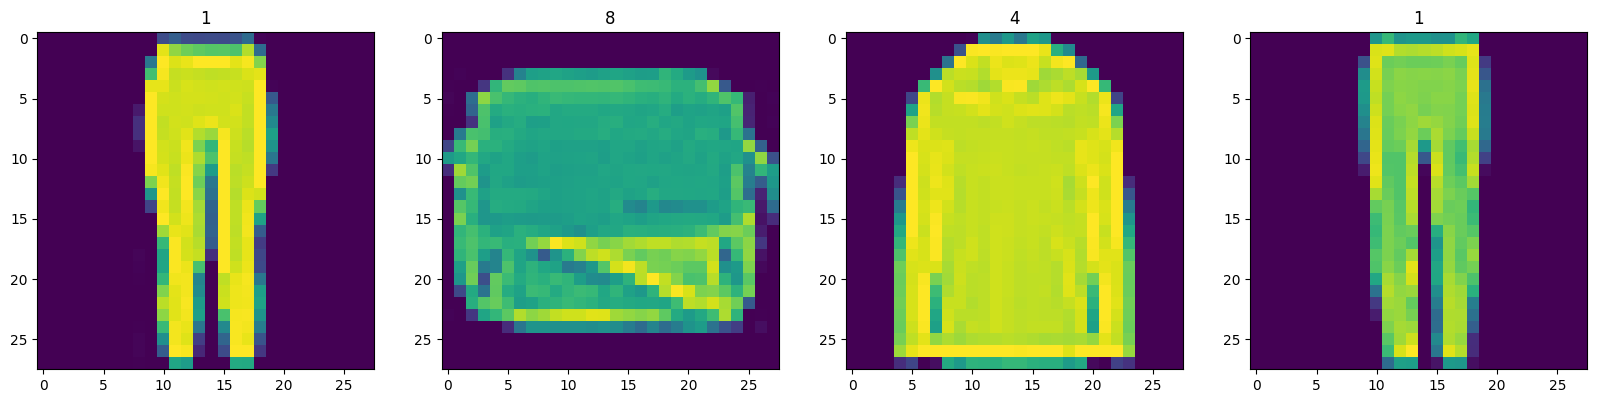

In [12]:
fig ,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  batch = data_iterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [13]:
def scale_images(data):
  image = data['image']
  return image/255

In [14]:
ds = tfds.load('fashion_mnist',split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [19]:
def build_generator():
  model = Sequential()
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))


  return model

In [20]:
test_model = build_generator()

In [21]:
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [22]:
img = test_model.predict(np.random.randn(4,128,1))

1/1 [==============================] - 2s 2s/step


In [23]:
img

array([[[[0.49537548],
         [0.4961548 ],
         [0.48629138],
         ...,
         [0.48687494],
         [0.49920624],
         [0.49866438]],

        [[0.5000775 ],
         [0.49575847],
         [0.48484424],
         ...,
         [0.49481776],
         [0.50064903],
         [0.49637434]],

        [[0.4953581 ],
         [0.49274564],
         [0.49342662],
         ...,
         [0.49645805],
         [0.50011367],
         [0.4985764 ]],

        ...,

        [[0.50126106],
         [0.49903545],
         [0.50739795],
         ...,
         [0.48986283],
         [0.49484685],
         [0.49623263]],

        [[0.5003391 ],
         [0.4997635 ],
         [0.50466883],
         ...,
         [0.49472713],
         [0.49572748],
         [0.49729383]],

        [[0.5005258 ],
         [0.49926323],
         [0.50177866],
         ...,
         [0.49794   ],
         [0.4973465 ],
         [0.5000913 ]]],


       [[[0.49723446],
         [0.49156767],
         [0.49

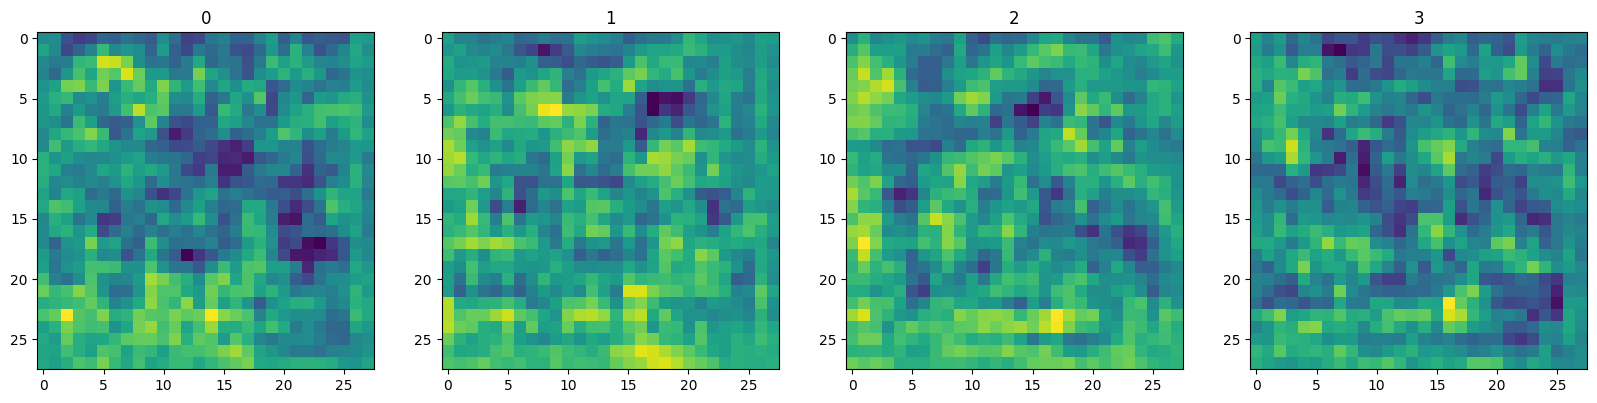

In [24]:
fig ,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(img):

  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)